# ABC analysis with Python

Let's do quick ABC analysis with Python and Pandas library.

ABC analysis is a categorization technique used in inventory management and control, which divides items into three categories **(A, B, and C)** based on their importance and value.

This method helps businesses prioritize their resources and focus on the most critical items that contribute the most to overall value.

We will work with common Superstore sales dataset as an example.




In [1]:
# importing Panadas for working with data and Mathplotlib for graphs
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# lets find Sheet names in our Excel file before importing
try:
    tabs = pd.ExcelFile("Superstore.xlsx").sheet_names
except:
    print('Cannot open file')

print(tabs)

['Orders']


In [3]:
# Now importing Orders sheet to DataFrame and looking at it's structure
df = pd.read_excel('Superstore.xlsx', sheet_name='Orders')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

for ABC analysis we need just 2 columns - product and sales. We can use Product Name but Product ID is even better since each Product ID is unique.

In [4]:
# lets group our orders by product Id and count total sales of each product
products = df.groupby('Product ID').agg(sales=('Sales','sum')).sort_values(by='sales', ascending=False).reset_index()
display(products.head)

<bound method NDFrame.head of            Product ID      sales
0     TEC-CO-10004722  61599.824
1     OFF-BI-10003527  27453.384
2     TEC-MA-10002412  22638.480
3     FUR-CH-10002024  21870.576
4     OFF-BI-10001359  19823.479
...               ...        ...
1857  OFF-AR-10003986      7.700
1858  OFF-EN-10001535      7.072
1859  OFF-PA-10000048      6.480
1860  OFF-LA-10003388      5.760
1861  OFF-AP-10002203      1.624

[1862 rows x 2 columns]>

In [5]:
# next we need to count cumulative sales for each products and add percentage from total sales
products['cumulative'] = products['sales'].cumsum()
products['percent'] = products['cumulative'] / products['sales'].sum()
display(products)

,Product ID,sales,cumulative,percent
0,TEC-CO-10004722,61599.824,6.159982e+04,0.026815
1,OFF-BI-10003527,27453.384,8.905321e+04,0.038766
2,TEC-MA-10002412,22638.480,1.116917e+05,0.048621
3,FUR-CH-10002024,21870.576,1.335623e+05,0.058141
4,OFF-BI-10001359,19823.479,1.533857e+05,0.066771
...,...,...,...,...
1857,OFF-AR-10003986,7.700,2.297180e+06,0.999991
1858,OFF-EN-10001535,7.072,2.297187e+06,0.999994
1859,OFF-PA-10000048,6.480,2.297193e+06,0.999997
1860,OFF-LA-10003388,5.760,2.297199e+06,0.999999


- let's set ABC categories for our products sorted in descending order by sales.

The idea of ABC categorization is in giving A category for top-selling products making 80% of total sales,
B for products makeing 10% more and C is for a least selling products making last 10% 

In [6]:
# preparing data for cutting our percentage data into A B C
names = ['A', 'B', 'C']
bins = [0, 0.8, 0.9, 1]

products['abc'] = pd.cut(products['percent'], bins=bins, labels=names)

display(products)

,Product ID,sales,cumulative,percent,abc
0,TEC-CO-10004722,61599.824,6.159982e+04,0.026815,A
1,OFF-BI-10003527,27453.384,8.905321e+04,0.038766,A
2,TEC-MA-10002412,22638.480,1.116917e+05,0.048621,A
3,FUR-CH-10002024,21870.576,1.335623e+05,0.058141,A
4,OFF-BI-10001359,19823.479,1.533857e+05,0.066771,A
...,...,...,...,...,...
1857,OFF-AR-10003986,7.700,2.297180e+06,0.999991,C
1858,OFF-EN-10001535,7.072,2.297187e+06,0.999994,C
1859,OFF-PA-10000048,6.480,2.297193e+06,0.999997,C
1860,OFF-LA-10003388,5.760,2.297199e+06,0.999999,C


- next thing we can do - assign RANK to each product in category. Top-5 products in A category will have ranks 1-2-3-4-5 , top-5 products from B category will have ranks 1-2-3-4-5  etc.

In [7]:
products['rank'] = products.groupby('abc')['sales'].rank('dense', ascending=False)
display(products)

,Product ID,sales,cumulative,percent,abc,rank
0,TEC-CO-10004722,61599.824,6.159982e+04,0.026815,A,1.0
1,OFF-BI-10003527,27453.384,8.905321e+04,0.038766,A,2.0
2,TEC-MA-10002412,22638.480,1.116917e+05,0.048621,A,3.0
3,FUR-CH-10002024,21870.576,1.335623e+05,0.058141,A,4.0
4,OFF-BI-10001359,19823.479,1.533857e+05,0.066771,A,5.0
...,...,...,...,...,...,...
1857,OFF-AR-10003986,7.700,2.297180e+06,0.999991,C,1183.0
1858,OFF-EN-10001535,7.072,2.297187e+06,0.999994,C,1184.0
1859,OFF-PA-10000048,6.480,2.297193e+06,0.999997,C,1185.0
1860,OFF-LA-10003388,5.760,2.297199e+06,0.999999,C,1186.0


- and the last move - let's merge nex ABC and RANK data from products table into main Orders data

In [8]:
df = df.merge(products, how='left', left_on='Product ID', right_on='Product ID')
display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,sales,cumulative,percent,abc,rank
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1263.957,1.875299e+06,0.816341,B,29.0
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,10637.528,4.926679e+05,0.214464,A,29.0
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,153.510,2.248166e+06,0.978655,C,543.0
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7242.768,7.414591e+05,0.322766,A,59.0
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,301.968,2.188086e+06,0.952501,C,267.0


- let's see a number of products in each category and total No of products

In [9]:
print(df.groupby('abc')['Product ID'].nunique())
print('-----------------')
print(df['Product ID'].nunique())

abc
A     413
B     240
C    1209
Name: Product ID, dtype: int64
-----------------
1862


- as we can see A category makes 22% from total number of products which is perfectly fits Pareto Rule (20% of products make 80% of sales)

Let's take a look on these figures in barchart

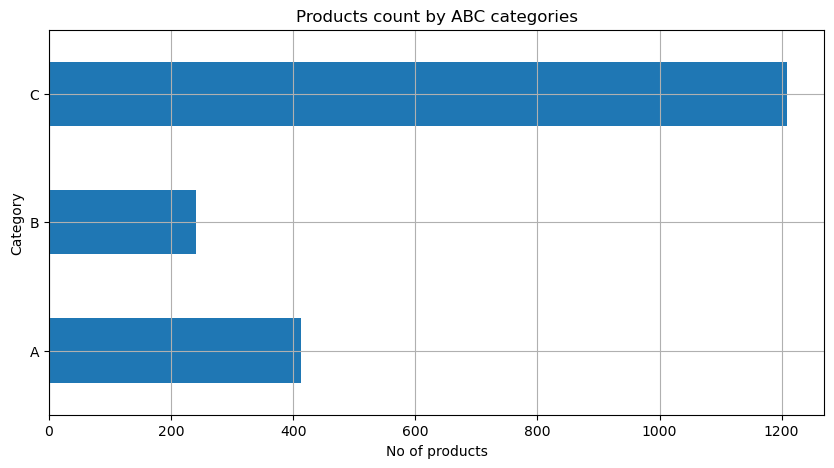

In [10]:
plt.figure(figsize=(10,5))
df.groupby('abc')['Product ID'].nunique().plot(kind='barh')
plt.title('Products count by ABC categories')
plt.grid(True)
plt.xlabel('No of products')
plt.ylabel('Category')

plt.show()

- you can ask: *- What can we do with all this information?*

Well, basically ABC analysis helps us to keep an eye on nost valuable products (A category) in terms of marketing, supply etc. We need to refresh ABC analysis on regular basis (depending of product lifecycle, competitors actions and many other factors)

For example, we now we can easly check **sales of top-3 products from each category YoY**


In [11]:
# first lets check corresponding dates
df['Order Date'].describe()

count                             9994
mean     2016-04-30 00:07:12.259355648
min                2014-01-03 00:00:00
25%                2015-05-23 00:00:00
50%                2016-06-26 00:00:00
75%                2017-05-14 00:00:00
max                2017-12-30 00:00:00
Name: Order Date, dtype: object

- Ok, we have orders from 2014 to 2017. Let's see top-3 product sales in **4Q of 2016 vs 4Q of 2017**

In [12]:
df['year'] = df['Order Date'].dt.year
top3_2016 = (
    df.query('(`Order Date` >= "2016-10-01" & `Order Date` <= "2016-12-31") & rank.isin([1, 2, 3])')
    .groupby(['Product ID', 'Product Name','year'])
    .agg(sales=('Sales', 'sum'), abc = ('abc','first'), rank=('rank','min'))
    .sort_values(by='sales', ascending=False)
    )
top3_2017 = (
    df.query('(`Order Date` >= "2017-10-01" & `Order Date` <= "2017-12-31") & rank.isin([1, 2, 3])')
    .groupby(['Product ID', 'Product Name','year'])
    .agg(sales=('Sales', 'sum'), abc = ('abc','first'), rank=('rank','min'))
    .sort_values(by='sales', ascending=False)
    )

display(top3_2016)
print('------------')
display(top3_2017)


,,,sales,abc,rank
Product ID,Product Name,year,,,
TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,2016,17499.950,A,1.0
OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,2016,1016.792,A,2.0
FUR-BO-10003893,Sauder Camden County Collection Library,2016,781.864,B,1.0
OFF-PA-10004039,Xerox 1882,2016,89.568,C,1.0


------------


,,,sales,abc,rank
Product ID,Product Name,year,,,
TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,2017,21699.938,A,1.0
OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,2017,6609.148,A,2.0
OFF-PA-10004475,Xerox 1940,2017,285.792,C,2.0
OFF-ST-10003656,Safco Industrial Wire Shelving,2017,230.376,B,2.0
OFF-ST-10000943,Eldon ProFile File 'N Store Portable File Tub Letter/Legal Size Black,2017,61.792,C,3.0
OFF-PA-10004039,Xerox 1882,2017,44.784,C,1.0


- what can we tell based on following data: in 2017 and 2016 we have only 3 products in common - Canon ImageClass, Fellowes PB500 and Xerox 1882 but others are missng - that's because we've done ABC categories and ranking based on WHOLE period of sales but products lineup can change over time.

For example we can see - there was not single Sauder Camden sold in 2017 but it was present in sales in 2016.

In [13]:
# lets merge these 2 datasets from 2016 and 2017 to see sales side-by-side
merged = top3_2017.merge(top3_2016, how='inner', on='Product Name', suffixes=['2017','2016']).sort_values(by='sales2017', ascending=False)
display(merged)

,sales2017,abc2017,rank2017,sales2016,abc2016,rank2016
Product Name,,,,,,
Canon imageCLASS 2200 Advanced Copier,21699.938,A,1.0,17499.950,A,1.0
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,6609.148,A,2.0,1016.792,A,2.0
Xerox 1882,44.784,C,1.0,89.568,C,1.0


- Let's build a barchart to see sales of these products face-to-face

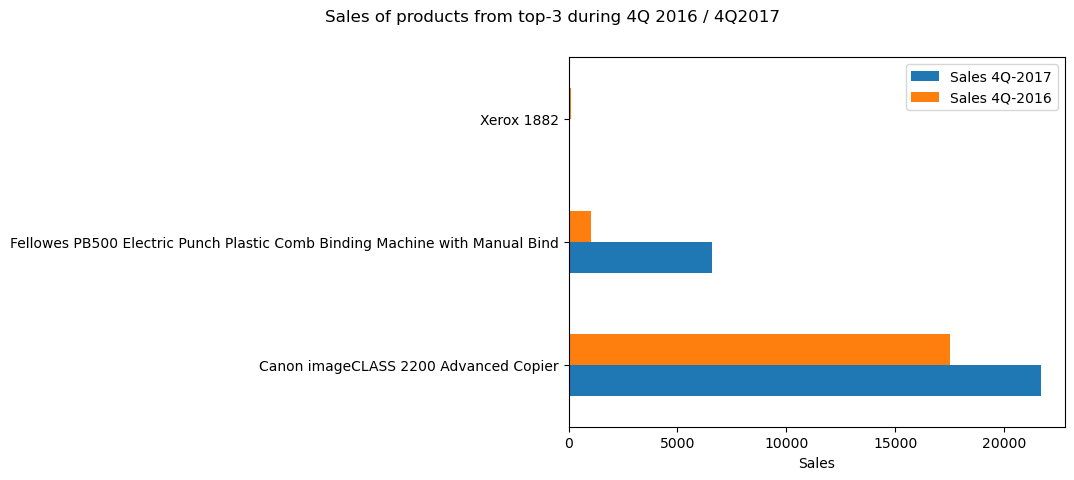

In [14]:
fig, ax = plt.subplots()

merged[['sales2017', 'sales2016']].plot(kind='barh', ax=ax)

fig.suptitle('Sales of products from top-3 during 4Q 2016 / 4Q2017', x=0.1)

ax.set_xlabel('Sales')
ax.set_ylabel('')

ax.legend(['Sales 4Q-2017', 'Sales 4Q-2016'])

plt.show()



- and the last thing we can do - SAVE our modified dataframe with ABC and rank data to new Excel file.

In [15]:
try:
    df.to_excel('Superstore_ABC_python_processed.xlsx')
except:
    print('Cannot write file')

